In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import Image, GridPlot

RFBOutputContext()


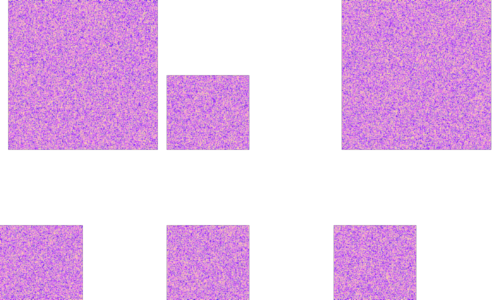

JupyterWgpuCanvas()

In [2]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

# grid with 2 rows and 3 columns
grid_shape = (2, 3)

# 2D view for all subplots in the grid
views = np.array(
    [
        ['2d', '2d', '2d'],
        ['2d', '2d', '2d']
    ]
)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = np.array(
    [
        [0, 3, 1],  # id each controller with an integer
        [2, 2, 3]
    ]
)

# Create the grid plot
grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=grid_shape,
    views=views,
    controllers=controllers
)

image_graphics = list()

# Make a random image graphic for each subplot
for subplot in grid_plot:
    img = (np.random.rand(512, 512) * 255).astype(np.float32)
    ig = Image(data=img, vmin=0, vmax=255, cmap='gnuplot2')
    image_graphics.append(ig)
    
    subplot.add_graphic(ig)

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        new_data = (np.random.rand(512, 512) * 255).astype(np.float32)
        ig.update_data(data=new_data)

# add the animation
grid_plot.add_animations([set_random_frame])

canvas.request_draw(grid_plot.animate)
canvas